In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
from sklearn.datasets import load_digits

In [9]:
X, Y = load_digits(return_X_y=True)

In [54]:
sorted_sum = np.sort(np.sum(X, axis=0))
print(sorted_sum)

[0.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 2.0000e+00 4.0000e+00
 5.0000e+00 1.0000e+01 1.3000e+01 1.6000e+01 4.9000e+01 9.0000e+01
 1.9400e+02 2.3300e+02 3.7100e+02 5.0200e+02 5.4600e+02 6.5500e+02
 1.2660e+03 2.4480e+03 2.8460e+03 3.2140e+03 3.3180e+03 3.5830e+03
 3.7160e+03 4.1650e+03 4.2040e+03 4.4380e+03 4.6750e+03 5.2280e+03
 6.2110e+03 6.6940e+03 9.3530e+03 9.9870e+03 1.0390e+04 1.2155e+04
 1.2366e+04 1.2566e+04 1.2755e+04 1.2989e+04 1.3490e+04 1.3570e+04
 1.3778e+04 1.3787e+04 1.4028e+04 1.4692e+04 1.4801e+04 1.5713e+04
 1.5739e+04 1.5852e+04 1.6302e+04 1.6337e+04 1.6921e+04 1.7142e+04
 1.7796e+04 1.7839e+04 1.8472e+04 1.8512e+04 1.8657e+04 2.1221e+04
 2.1269e+04 2.1291e+04 2.1527e+04 2.1724e+04]


In [36]:
# Plotting digits
def plot_digits(X, Y):
    fig, axs = plt.subplots(10, 5, figsize=(20, 35))

    for target in range(10):

        idata = 0
        icol = 0
        while icol < 5:

            keep_going = True
            while keep_going:
                idata += 1
                if Y[idata] == target:
                    # Found a image
                    keep_going = False

            # Plotting image in icol and shifting icol ahead 
            axs[target][icol].imshow(X[idata].reshape(8, 8), cmap='gray_r')
            icol += 1
    plt.show()

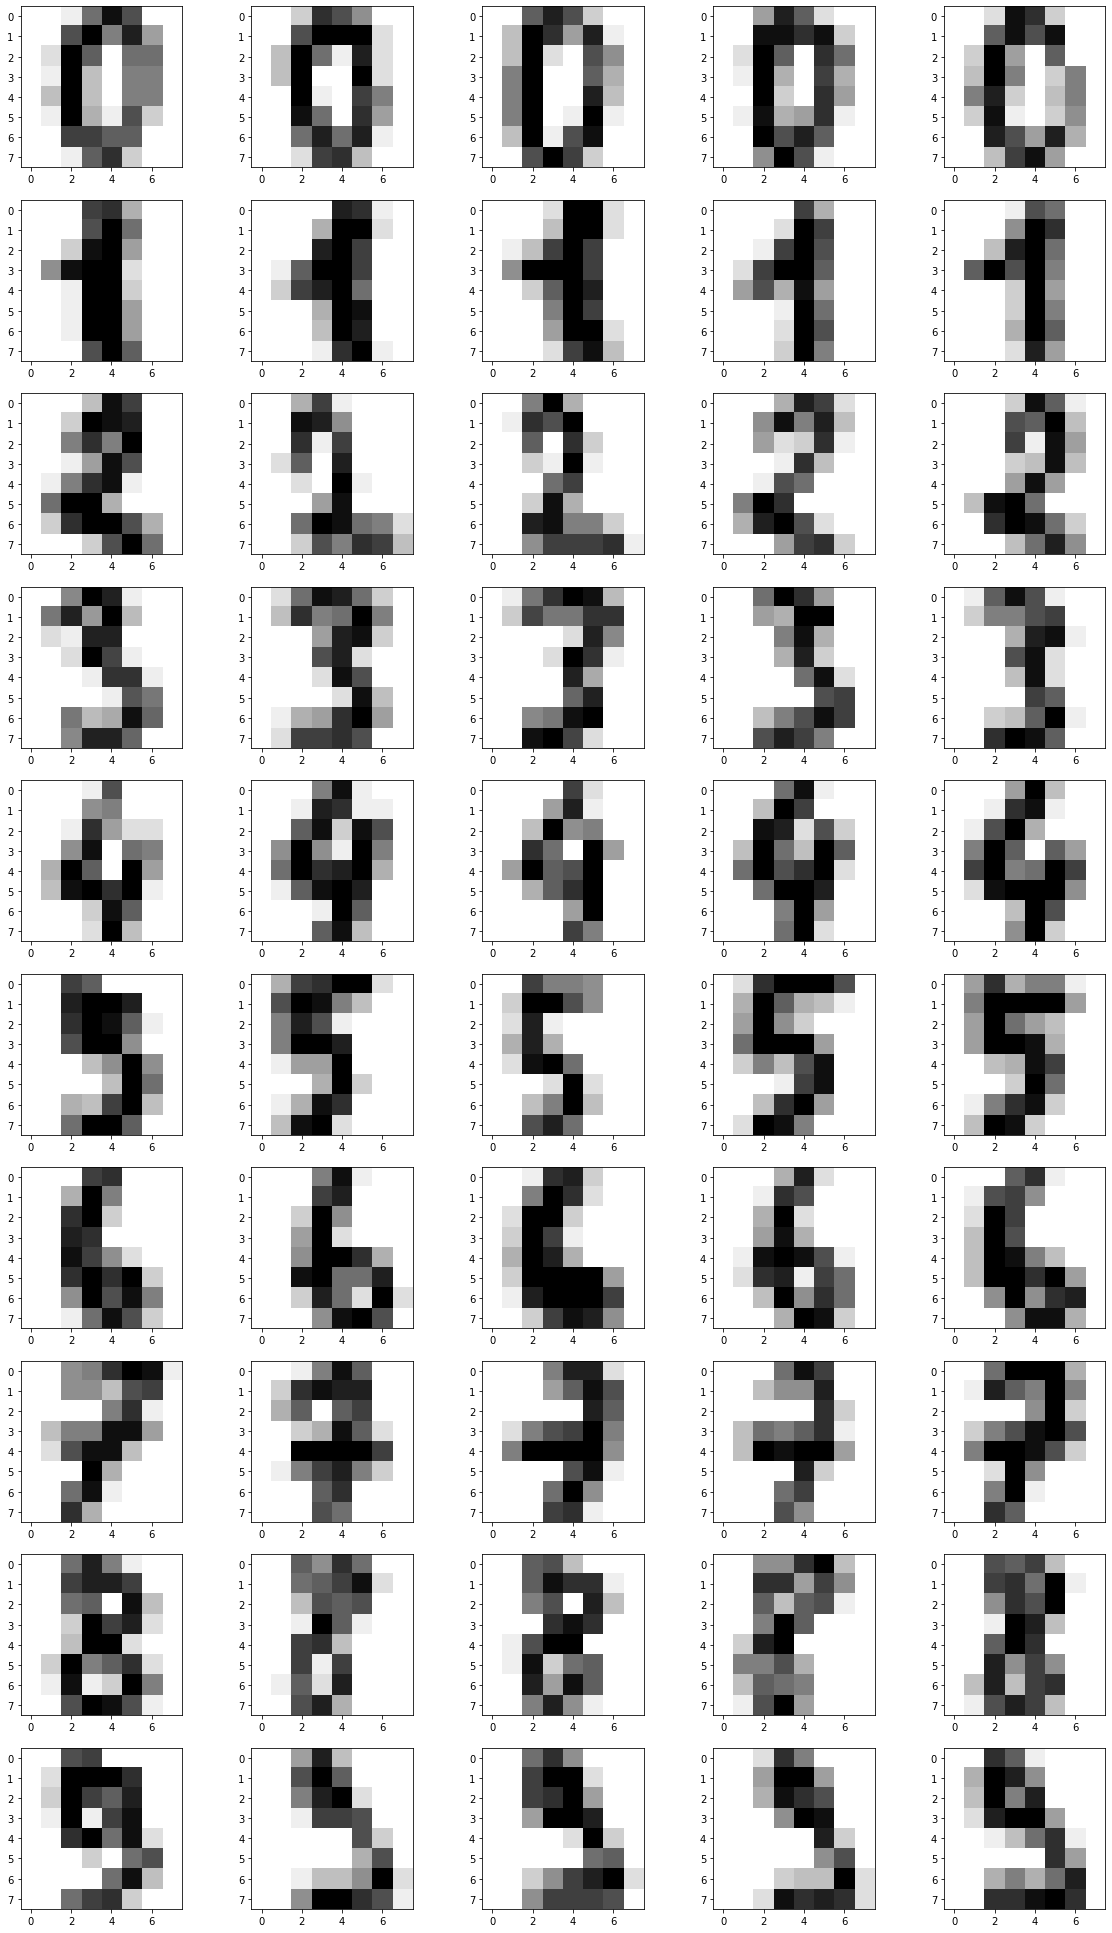

In [37]:
plot_digits(X, Y)

In [17]:
X[0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [38]:
from sklearn.decomposition import PCA

In [39]:
pca = PCA().fit(X)

In [40]:
X_pca = pca.transform(X)

In [41]:
pca.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

<BarContainer object of 64 artists>

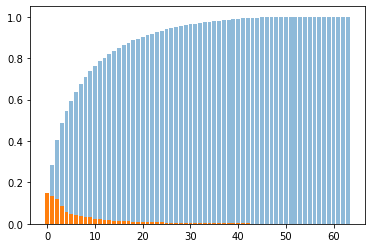

In [56]:
# Plotting exapleined variance

ax = plt.gca()

N = len(pca.explained_variance_ratio_)

cumulative = np.cumsum(pca.explained_variance_ratio_)
ax.bar(range(N), cumulative, alpha=0.5)

ax.bar(range(N), pca.explained_variance_ratio_)
# ax.set_yscale('log')

In [57]:
def plot_pca_digits(X, Y, n_components):
    pca = PCA(n_components=n_components).fit(X)
    X_pca = pca.transform(X)
    X_inv = pca.inverse_transform(X_pca)
    plot_digits(X_inv, Y)

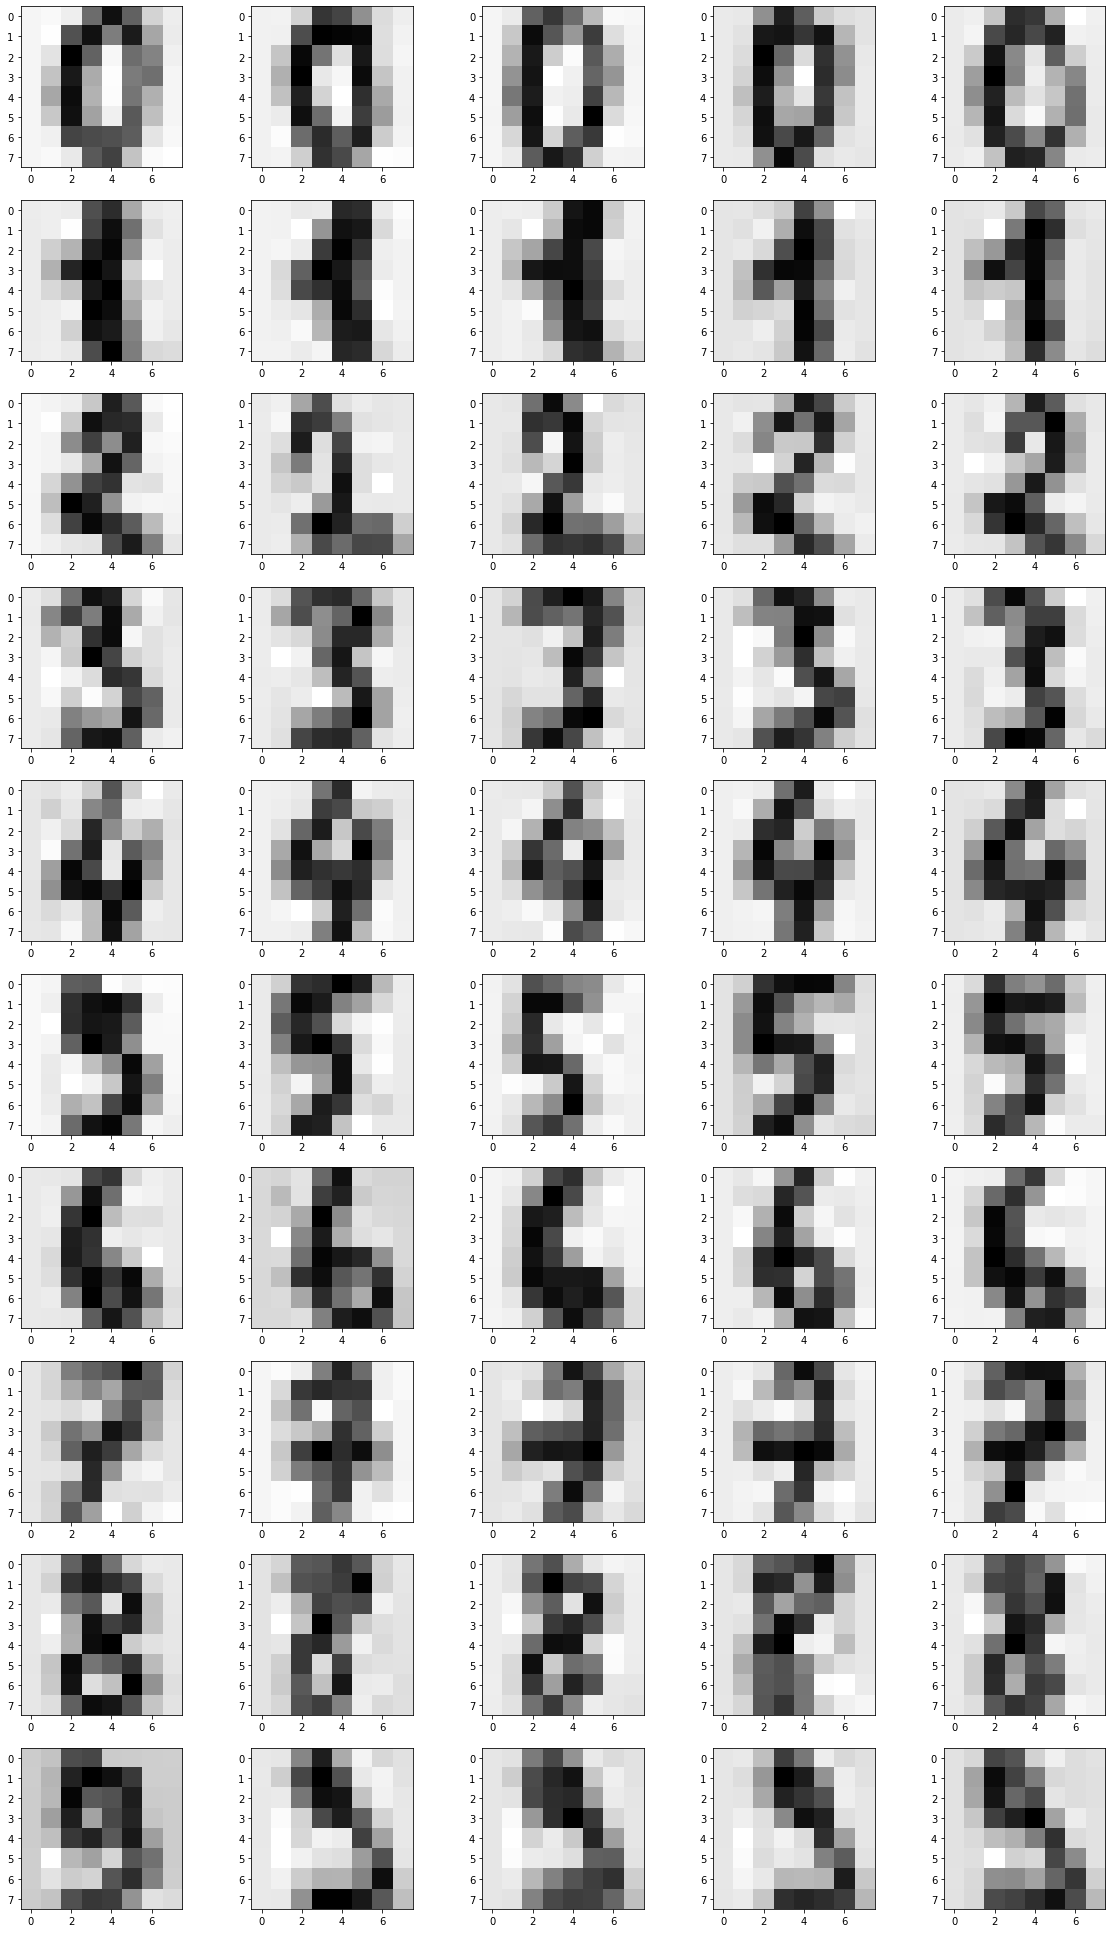

In [63]:
plot_pca_digits(X, Y, 30)

## Modeling

In [95]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

In [98]:
pca = PCA(n_components=5).fit(X)
X_pca = pca.transform(X)
X_inv = pca.inverse_transform(X_pca)

In [99]:
clf = MLPClassifier(
    hidden_layer_sizes=(100, 30),
    batch_size=20,
    learning_rate='constant',
    learning_rate_init=0.001,
    early_stopping=True
).fit(X_pca, Y)

In [100]:
Y_pred = clf.predict(X_pca)
np.unique(Y_pred)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [101]:
acc = accuracy_score(Y, Y_pred)
print('Acc = {}'.format(acc))

Acc = 0.9549248747913188


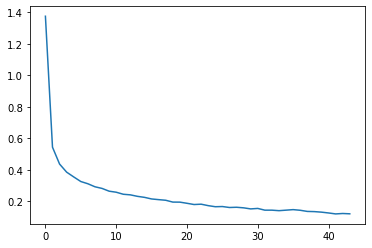

In [102]:
# Plotting loss curve

ax = plt.gca()

ax.plot(range(len(clf.loss_curve_)), clf.loss_curve_)

In [103]:
print(
    f"Classification report for classifier {clf}:\n"
    f"{classification_report(Y, Y_pred)}\n"
)

Classification report for classifier MLPClassifier(batch_size=20, early_stopping=True, hidden_layer_sizes=(100, 30)):
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       178
           1       0.95      0.98      0.97       182
           2       0.97      0.95      0.96       177
           3       0.93      0.92      0.92       183
           4       0.97      0.97      0.97       181
           5       0.99      0.98      0.99       182
           6       1.00      0.99      1.00       181
           7       0.97      0.96      0.96       179
           8       0.90      0.89      0.89       174
           9       0.90      0.92      0.91       180

    accuracy                           0.95      1797
   macro avg       0.95      0.95      0.95      1797
weighted avg       0.96      0.95      0.95      1797


